In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install faker

In [3]:
from faker import Faker
fake = Faker()

In [4]:
def faker_categorical(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "Name": fake.name(),
            "Age": np.random.choice([np.random.randint(20, high =30),np.random.randint(30, high = 46),np.random.randint(46, high = 60)], p=[0.15, 0.7, 0.15]),
            "Wins/ Losses": np.random.choice(["Wins", "Loses"], p=[0.3, 0.7]),
            "Profession": np.random.choice(["IT", "Government", "Own Business", "Others"], p=[0.5, 0.3, 0.1, 0.1]),
            "First Car": np.random.choice(["Yes", "No"], p=[0.8, 0.2]),
            "Source of Info":  np.random.choice(["Friend", "Own","Ad Offer"], p=[0.7, 0.2, 0.1]),
            "Exchange": np.random.choice(["Yes", "No"], p=[0.8, 0.2])
        }
        for x in range(num)
    ]
    return output

In [5]:
df = pd.DataFrame(faker_categorical(num=5000, seed=0))

In [6]:
df.head()

,Age,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,49,Yes,Yes,Norma Fisher,Government,Friend,Loses
1,36,Yes,Yes,Jorge Sullivan,Others,Friend,Loses
2,46,Yes,Yes,Elizabeth Woods,IT,Friend,Loses
3,39,Yes,Yes,Susan Wagner,IT,Friend,Loses
4,20,Yes,No,Peter Montgomery,IT,Friend,Wins


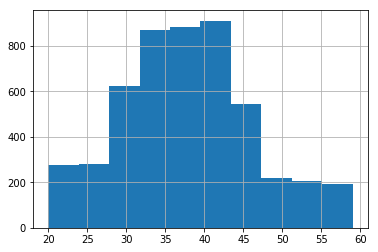

In [7]:
df.Age.hist()

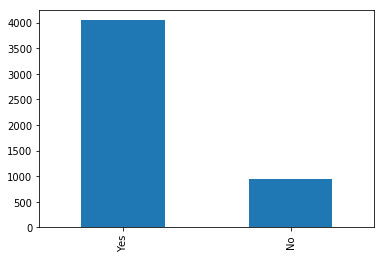

In [8]:
df.Exchange.value_counts().plot(kind="bar")

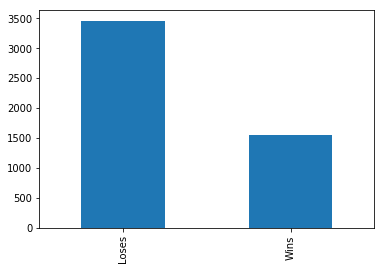

In [9]:
df['Wins/ Losses'].value_counts().plot(kind="bar")

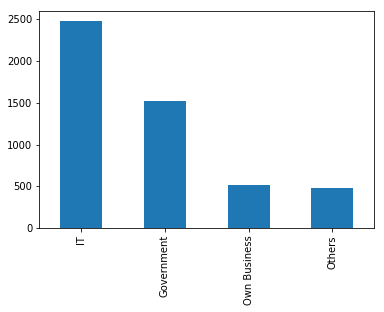

In [10]:
df['Profession'].value_counts().plot(kind="bar")

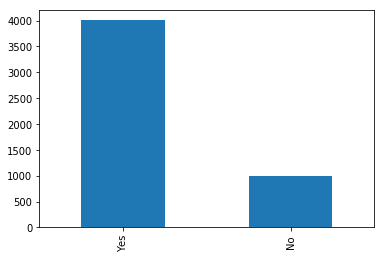

In [11]:
df['First Car'].value_counts().plot(kind="bar")

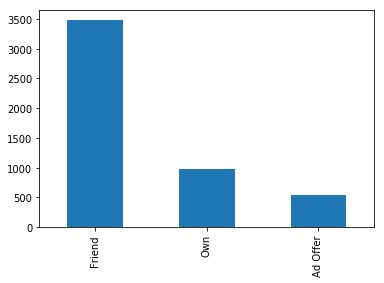

In [12]:
df['Source of Info'].value_counts().plot(kind="bar")

In [13]:
df.isnull().sum()

Age               0
Exchange          0
First Car         0
Name              0
Profession        0
Source of Info    0
Wins/ Losses      0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df_cat=df.select_dtypes(include=[object])

In [16]:
df_num=df.select_dtypes(include=[np.number])

In [17]:
df_cat.head()

,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,Yes,Yes,Norma Fisher,Government,Friend,Loses
1,Yes,Yes,Jorge Sullivan,Others,Friend,Loses
2,Yes,Yes,Elizabeth Woods,IT,Friend,Loses
3,Yes,Yes,Susan Wagner,IT,Friend,Loses
4,Yes,No,Peter Montgomery,IT,Friend,Wins


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
df_cat=df_cat.apply(le.fit_transform)

In [21]:
df_cat.head()

,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,1,1,3607,0,1,0
1,1,1,2249,2,1,0
2,1,1,1428,1,1,0
3,1,1,4409,1,1,0
4,1,0,3726,1,1,1


In [22]:
data_final=pd.concat([df_num,df_cat],axis=1)

In [23]:
data_final.head()

,Age,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,49,1,1,3607,0,1,0
1,36,1,1,2249,2,1,0
2,46,1,1,1428,1,1,0
3,39,1,1,4409,1,1,0
4,20,1,0,3726,1,1,1


In [24]:
data_final_1=data_final.drop('Name',axis=1)

In [25]:
data_final_1.head()

,Age,Exchange,First Car,Profession,Source of Info,Wins/ Losses
0,49,1,1,0,1,0
1,36,1,1,2,1,0
2,46,1,1,1,1,0
3,39,1,1,1,1,0
4,20,1,0,1,1,1


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.79036151 0.03078753 0.01224004 0.11455319 0.05205774]


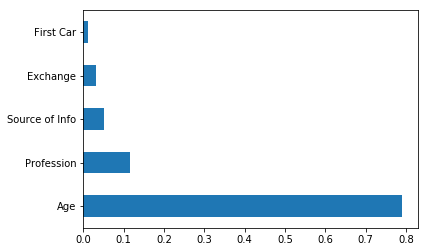

In [26]:
X = data_final_1.iloc[:,0:5]  #independent columns
y = data_final_1.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [27]:
x=data_final_1.iloc[:,0:5]
y=data_final_1.iloc[:,-1]

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini'],
                'splitter': ['best','random']
            }
        },
        'logistic_regreesion':{
            'model':LogisticRegression(),
            'params':{
                'dual':[True,False]
            }
        },
        'kneighbors':{
            'model':KNeighborsClassifier(),
            'params':{
                'weights':['uniform'],
                'algorithm':['auto']
            }
        },
        'Randomforest':{
            'model':RandomForestClassifier(),
            'params':{
                'criterion':['gini'],
                'max_depth':[None]
            }
        },
        'naivebayes':{
            'model':GaussianNB(),
            'params':{
                'priors':[None]
            }
        }
    }
            
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futu

,model,best_score,best_params
0,linear_regression,-0.001988,{'normalize': False}
1,lasso,-0.001400,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.661400,"{'criterion': 'gini', 'splitter': 'random'}"
3,logistic_regreesion,0.699000,{'dual': True}
4,kneighbors,0.625200,"{'algorithm': 'auto', 'weights': 'uniform'}"
5,Randomforest,0.646600,"{'criterion': 'gini', 'max_depth': None}"
6,naivebayes,0.699000,{'priors': None}


In [95]:
from sklearn.linear_model import LogisticRegression

In [138]:
from sklearn.naive_bayes import GaussianNB

In [96]:
lg=LogisticRegression()

In [97]:
lg.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
prediction1=lg.predict(x_test)

In [100]:
from sklearn.model_selection import  cross_val_score

In [101]:
score=cross_val_score(lg,x_train,y_train,cv=5)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [103]:
score.mean()

0.6871645129228783

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test,prediction1)

0.7012121212121212

In [128]:
x_train.head()

,Age,Exchange,First Car,Profession,Source of Info
1522,51,1,1,3,2
835,36,1,1,1,2
358,34,1,1,0,1
138,57,1,1,3,0
299,36,1,1,1,0


In [129]:
y_train.head()

1522    0
835     0
358     0
138     0
299     0
Name: Wins/ Losses, dtype: int32

In [136]:
lg.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
lg.predict([[51,1,1,3,2]])

array([0])

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
confusion_matrix(y_test,prediction1)

array([[1157,    0],
       [ 493,    0]], dtype=int64)

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
sc=StandardScaler()

In [121]:
sc_xtrain=sc.fit_transform(x_train)
sc_xtest=sc.transform(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  


In [122]:
lg.fit(sc_xtrain,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
lg.score(sc_xtrain,y_train)

0.6871641791044776

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [125]:
prediction2=lg.predict(sc_xtest)

In [126]:
cm=confusion_matrix(y_test,prediction2)

In [127]:
cm

array([[1157,    0],
       [ 493,    0]], dtype=int64)

cm

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(x, y):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',data_final_1['Wins/ Losses'].value_counts().values/ len(data_final_1))

x_train shape (4000, 5)
y_train shape (4000,)
x_test shape (1000, 5)
y_test shape (1000,)

ratio of target in y_train : [0.69175 0.30825]
ratio of target in y_test : [0.692 0.308]
ratio of target in original_data : [0.6918 0.3082]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'RandomForestClassifier':RandomForestClassifier(max_depth=None,random_state=42),
    'GaussianNB':GaussianNB()
}


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [31]:

def train_eval_train(models, x, y):
    for name, model in models.items():
        print(name,':')
        model.fit(x, y)
        loss(y, model.predict(x))
        print('-'*30)
        
train_eval_train(models, x_train, y_train)

LogisticRegression :
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.647
  acc: 0.692
------------------------------
KNeighborsClassifier :


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


  pre: 0.512
  rec: 0.287
  f1: 0.368
  loss: 10.500
  acc: 0.696
------------------------------
SVC :


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.647
  acc: 0.692
------------------------------
DecisionTreeClassifier :
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.647
  acc: 0.692
------------------------------
RandomForestClassifier :
  pre: 0.686
  rec: 0.319
  f1: 0.435
  loss: 8.807
  acc: 0.745
------------------------------
GaussianNB :
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.647
  acc: 0.692
------------------------------


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default v

In [35]:
x=data_final_1.iloc[:,0:5]
y=data_final_1.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf=RandomForestClassifier()

In [55]:
rf.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
rf.score(x_train,y_train)

0.7471641791044776

In [68]:
prediction=rf.predict(x_test)

In [74]:
from sklearn.model_selection import  cross_val_score

In [78]:
score=cross_val_score(rf,x_train,y_train,cv=8)

In [81]:
score.mean()

0.6403042244009088

In [82]:
#from sklearn.metrics import accuracy_score

In [83]:
#accuracy_score(y_test,predict)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
confusion_matrix(y_test,predict)

array([[947, 185],
       [440,  78]], dtype=int64)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf=RandomForestClassifier()